## <center>**PROJECT: ```Fraud Detection Using Credit Card Transactions```**</center>

# <center>**FILE 1: ```EDA```**</center>

## **Imports**

In [59]:
import missingno
import pandas as pd
import seaborn as sns
import geopandas as gpd
from copy import deepcopy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## **Dataset Loading**
The following Python code snippet reads data from a CSV file using the `pandas` library:

In [60]:
df = pd.read_csv('Dataset/fraudTrain.csv')
print(df.shape)

(1296675, 23)


The following Python code snippet calculates and prints the number of rows in the previously loaded DataFrame:


In [61]:
num_rows = df.shape[0]
print("Number of rows:", num_rows)

Number of rows: 1296675


The following Python code snippet displays the first three rows of the previously loaded DataFrame:


In [62]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


## **Dataset Preprocessing and Visualization**

### ```Remove the unnamed index column```

In [63]:
df = df.drop(columns=df.columns[df.columns.str.contains('Unnamed')])

In [64]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### ```Splitting 1st column into seperate time and date fields: This is the part of Feature Engineering section but doing this here for better visualization```
The following Python code snippet adds two new columns, 'Dates' and 'Time', to the DataFrame by extracting date and time information from the 'trans_date_trans_time' column:

In [65]:
df['Dates'] = pd.to_datetime(df['trans_date_trans_time']).dt.date
df['Time'] = pd.to_datetime(df['trans_date_trans_time']).dt.time

In [66]:
columns = df.columns
columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'Dates', 'Time'],
      dtype='object')

In [67]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


### ```Checking Missing Values in DataFrame```

The following Python code snippet assesses and displays the number of missing values in each column of a DataFrame:


In [68]:
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
Dates                    0
Time                     0
dtype: int64


<Axes: >

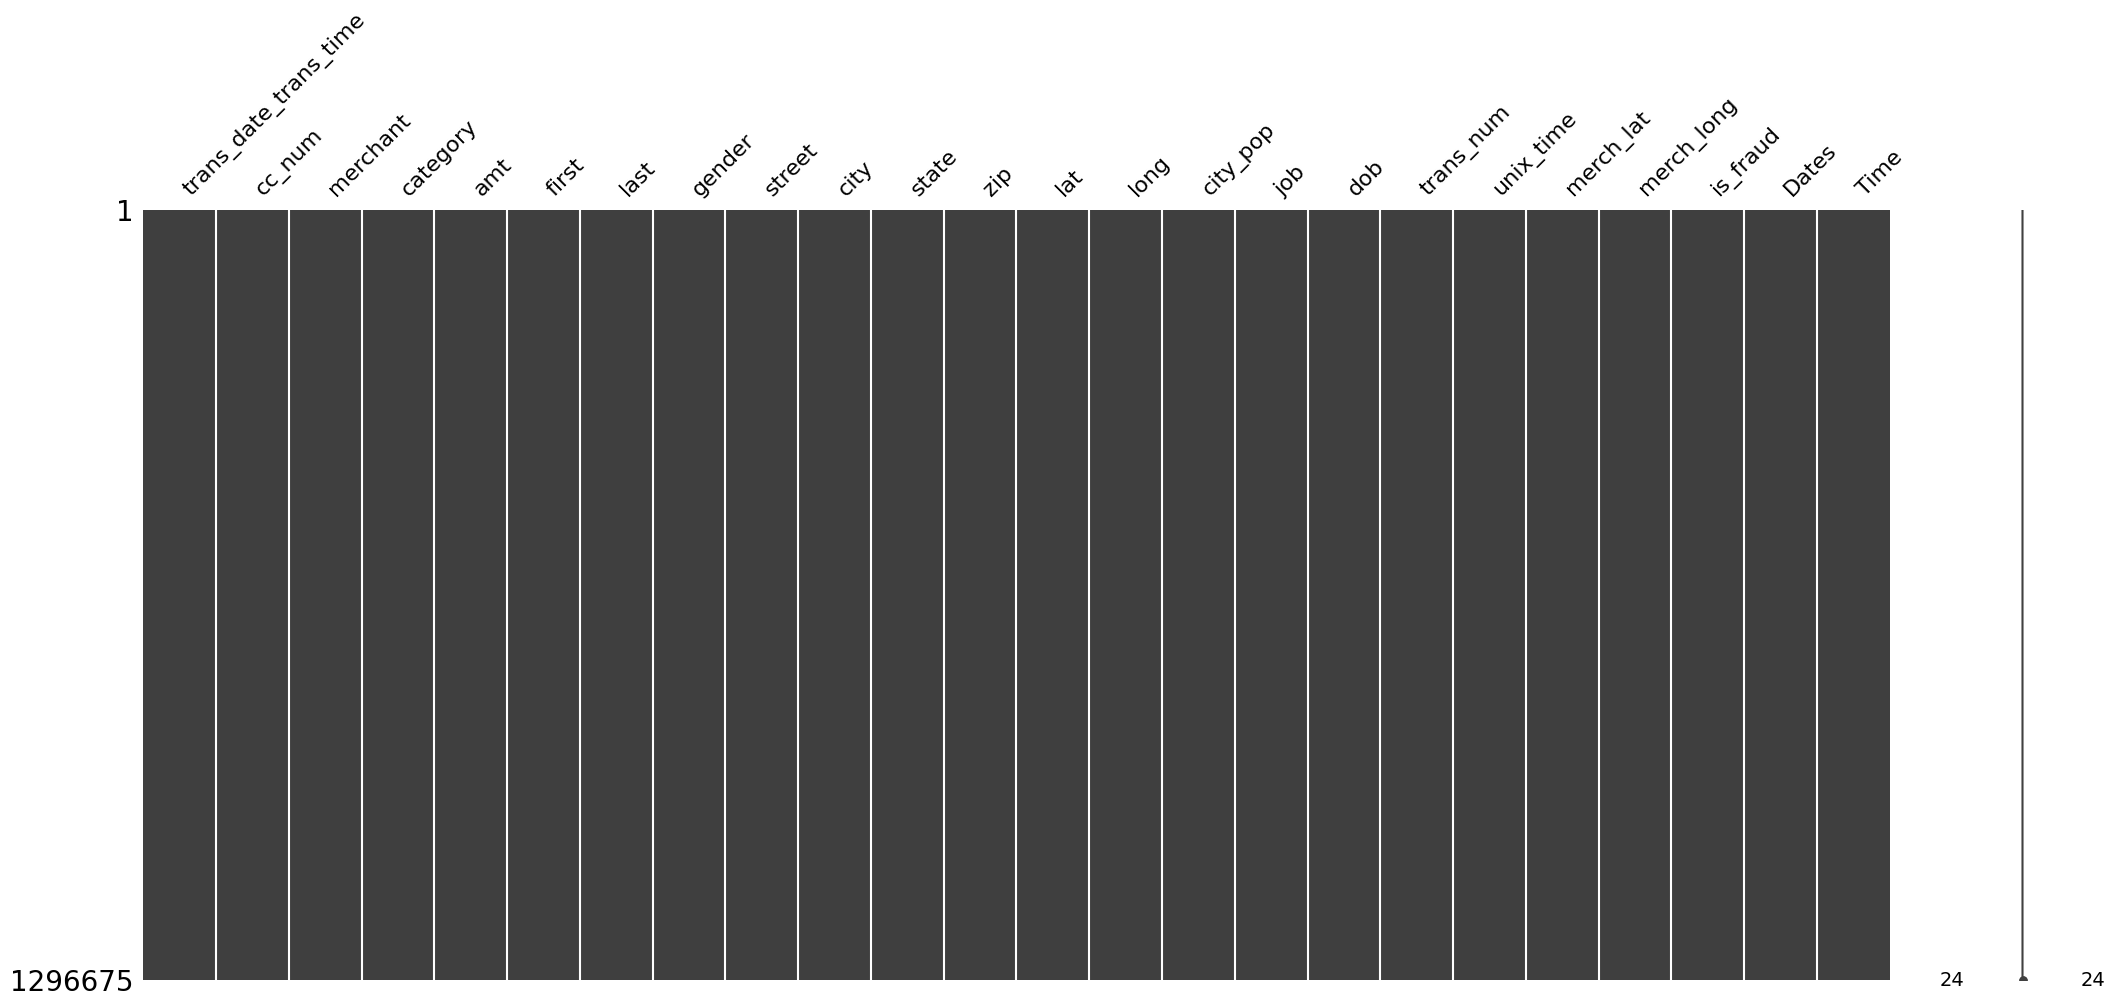

In [69]:
missingno.matrix(df)

### ```Visualizing Class Distribution```

The following Python code snippet plots a bar chart to visualize the distribution of each class in the 'is_fraud' column:


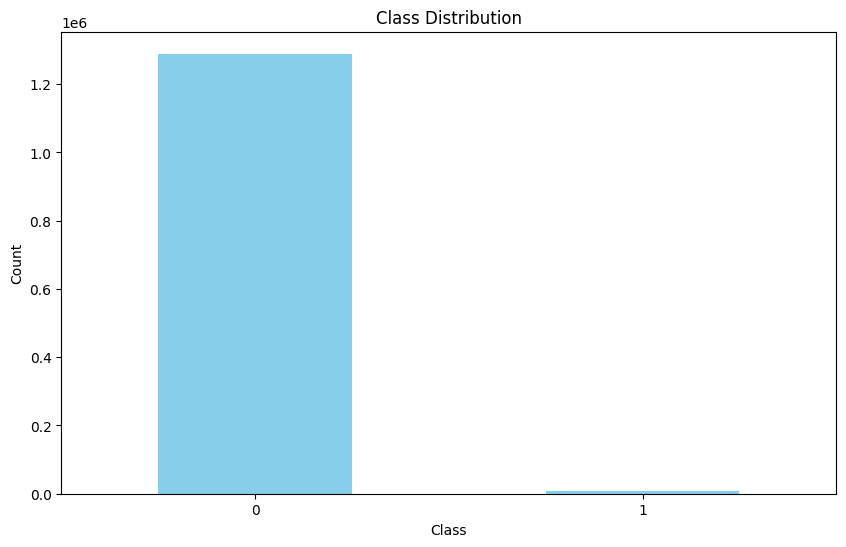

In [70]:
class_distribution = df["is_fraud"].value_counts()
class_distribution.plot(kind='bar', rot=0, color='skyblue', figsize=(10, 6))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Class labels Percentages, that helps in observing class skewness

In [71]:
print('No Frauds', round(df['is_fraud'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['is_fraud'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.42 % of the dataset
Frauds 0.58 % of the dataset


In [72]:
class_counts = df["is_fraud"].value_counts()
print(class_counts)

is_fraud
0    1289169
1       7506
Name: count, dtype: int64


### ```Convert 'trans_date_trans_time' to datetime and create 'Time' column: This is the part of Feature Engineering section but doing this here for better visualization```

In [73]:
# Convert 'trans_date_trans_time' to datetime and create 'Time' column
df['Time'] = pd.to_datetime(df['trans_date_trans_time'])

### ```Create a new column 'Hour' representing time in minutes: This is the part of Feature Engineering section but doing this here for better visualization```

In [74]:
# Create a new column 'Hour' representing time in minutes
df['Hour'] = df['Time'].dt.hour * 60 + df['Time'].dt.minute

# Create bins for 2-hour intervals
bins = range(0, 25 * 60, 2 * 60)

# Cut the data into bins
df['HourBin'] = pd.cut(df['Hour'], bins=bins, right=False)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 26 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  object        
 1   cc_num                 1296675 non-null  int64         
 2   merchant               1296675 non-null  object        
 3   category               1296675 non-null  object        
 4   amt                    1296675 non-null  float64       
 5   first                  1296675 non-null  object        
 6   last                   1296675 non-null  object        
 7   gender                 1296675 non-null  object        
 8   street                 1296675 non-null  object        
 9   city                   1296675 non-null  object        
 10  state                  1296675 non-null  object        
 11  zip                    1296675 non-null  int64         
 12  lat                    12966

In [76]:
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Dates,Time,Hour,HourBin
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,2019-01-01 00:00:18,0,"[0, 120)"
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,2019-01-01 00:00:44,0,"[0, 120)"
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,2019-01-01 00:00:51,0,"[0, 120)"


### ```Boxplot for Each Variable in Numerical List```

In this section, we define a function `boxplots_visual` to create boxplots for each variable in a numerical list. The function takes two parameters: `data` (the DataFrame containing the numerical variables) and `column` (the list of numerical column names).


In [77]:
numerical = list(df.select_dtypes(include=['int64', 'float64']).columns)

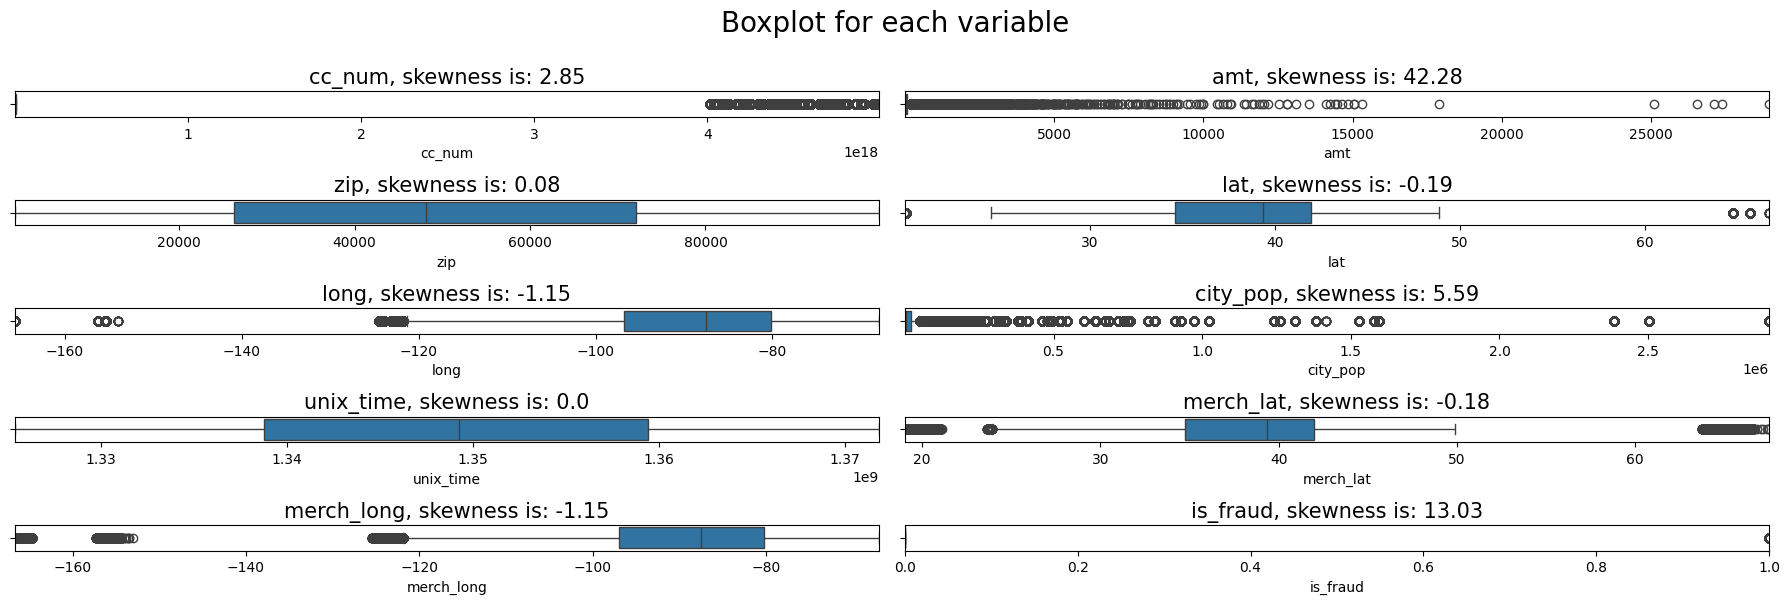

In [78]:
# Boxplot for each variable in numerical list

def boxplots_visual(data,column):
    fig, ax = plt.subplots(5,2,figsize=(18,6))
    fig.suptitle('Boxplot for each variable',y=1, size=20)
    ax=ax.flatten()
    for i,feature in enumerate(column):
        sns.boxplot(data=data[feature],ax=ax[i], orient='h')
        ax[i].set_title(feature+ ', skewness is: '+str(round(data[feature].skew(axis = 0, skipna = True),2)),fontsize=15)
        ax[i].set_xlim([min(data[feature]), max(data[feature])])
boxplots_visual(data=df,column=numerical)
plt.tight_layout()

### ```Visualizing Time Data Distribution in Bins```

The following Python code snippet creates a bar plot to visualize the distribution of time data in bins:


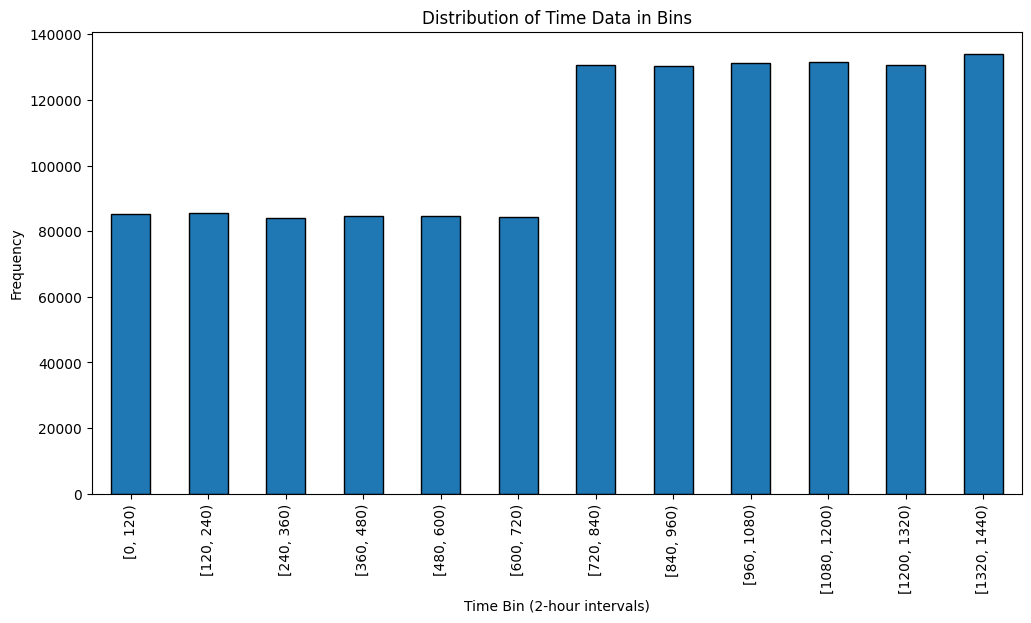

In [79]:
# Create a bar plot of the time data with bins
plt.figure(figsize=(12, 6))
df['HourBin'].value_counts(sort=False).plot(kind='bar', edgecolor='black')
plt.title('Distribution of Time Data in Bins')
plt.xlabel('Time Bin (2-hour intervals)')
plt.ylabel('Frequency')
plt.show()


### ```Histogram of Time Data Distribution```

The following Python code snippet generates a histogram to illustrate the distribution of time data:


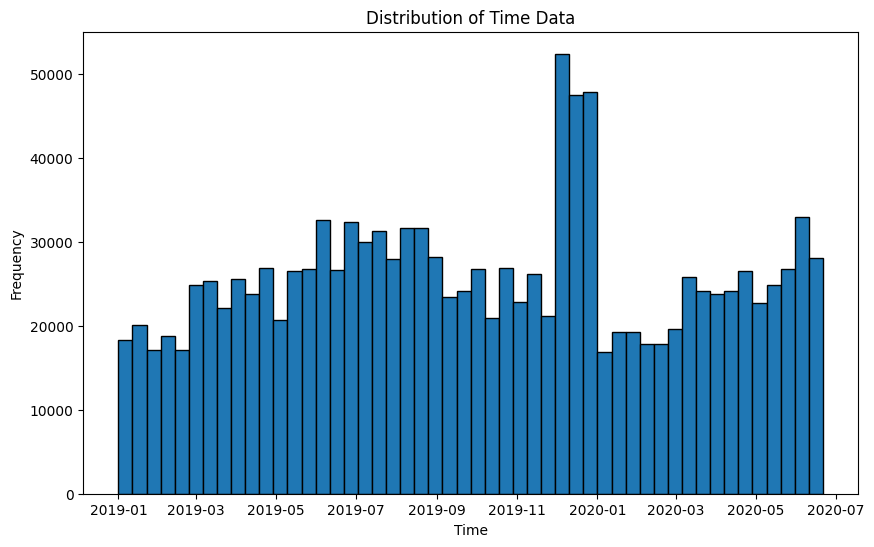

In [80]:
# Create a histogram of the time data
plt.figure(figsize=(10, 6))
plt.hist(df['Dates'], bins=50, edgecolor='black')
plt.title('Distribution of Time Data')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

### ```Histogram of Fraudulent Transactions by Date```

The following Python code snippet filters the DataFrame for fraudulent transactions and creates a histogram to visualize their distribution over specific dates:


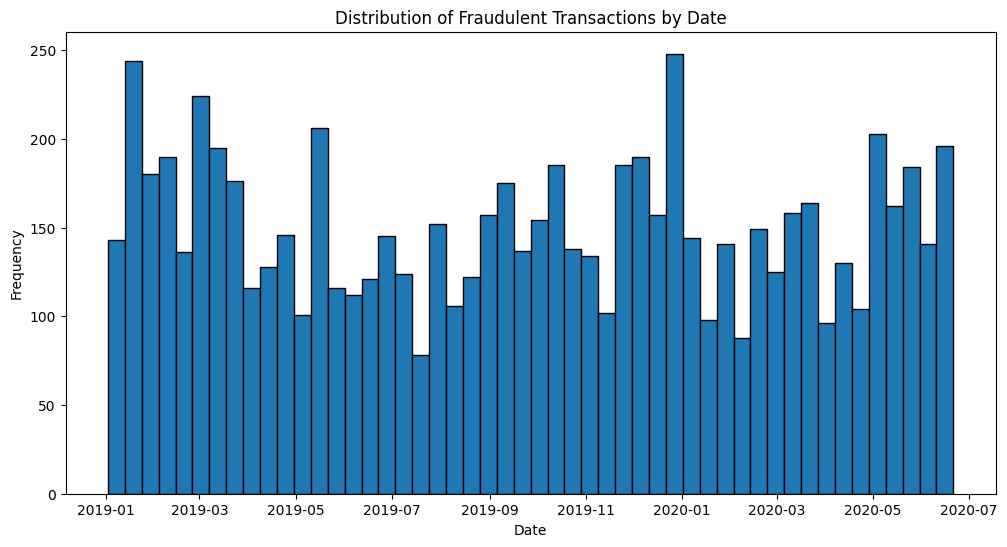

In [81]:
# Filter the DataFrame for fraudulent transactions
fraudulent_df = df[df['is_fraud'] == 1]

# Create a histogram of fraudulent transactions with respect to specific dates
plt.figure(figsize=(12, 6))
plt.hist(fraudulent_df['Dates'], bins=50, edgecolor='black')
plt.title('Distribution of Fraudulent Transactions by Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

### ```Bar Plot of Time Data in Bins, Differentiating by Fraud Status```

The following Python code snippet creates a bar plot to compare the distribution of time data in bins, differentiating by fraud status:


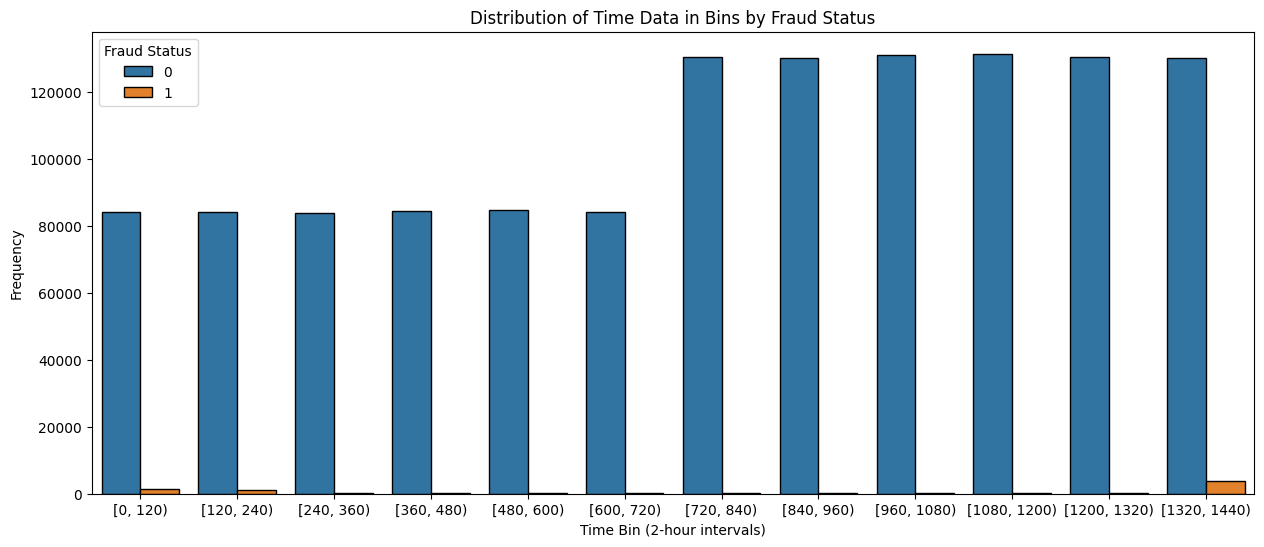

In [82]:
# Create a bar plot of the time data with bins, differentiating by fraud status
plt.figure(figsize=(15, 6))
sns.countplot(x='HourBin', hue='is_fraud', data=df, edgecolor='black')
plt.title('Distribution of Time Data in Bins by Fraud Status')
plt.xlabel('Time Bin (2-hour intervals)')
plt.ylabel('Frequency')
plt.legend(title='Fraud Status')
plt.show()

### ```Fraud Distribution by Gender```

In this analysis, we are visualizing the distribution of frauds based on gender. The bar chart provides insights into the percentage of frauds attributed to each gender.


In [83]:
df["gender"].value_counts(normalize=True)

gender
F    0.547449
M    0.452551
Name: proportion, dtype: float64

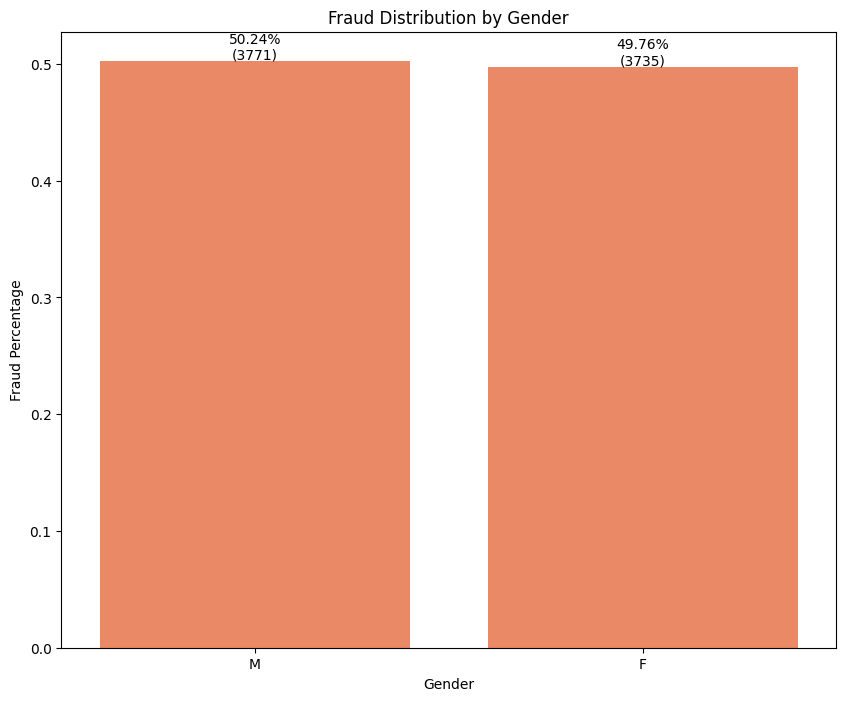

In [84]:
gender_fraud_counts = df[df['is_fraud'] == 1]['gender'].value_counts(normalize=True)

# Plotting the bar chart
plt.figure(figsize=(10, 8))
ax = sns.barplot(x=gender_fraud_counts.index, y=gender_fraud_counts.values, color='coral')

# Annotate the bars with count and percentage
for p, label in zip(ax.patches, gender_fraud_counts):
    ax.annotate(f'{label:.2%}\n({int(label * len(df[df["is_fraud"] == 1]))})',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

plt.title('Fraud Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Fraud Percentage')
plt.show()

It is observed that the proportion between genders committing fraud is very similar, which makes this factor likely not predominant.

### ```Transaction Amount Distribution```

**Transaction Amount Distribution**

- The plot displays the distribution of transaction amounts (`'amt'`).
- The x-axis represents the transaction amount values, and the y-axis represents the density of transactions at each amount.
- The distribution is right-skewed, indicating that the majority of transactions have lower amounts, with a long tail extending to higher amounts.



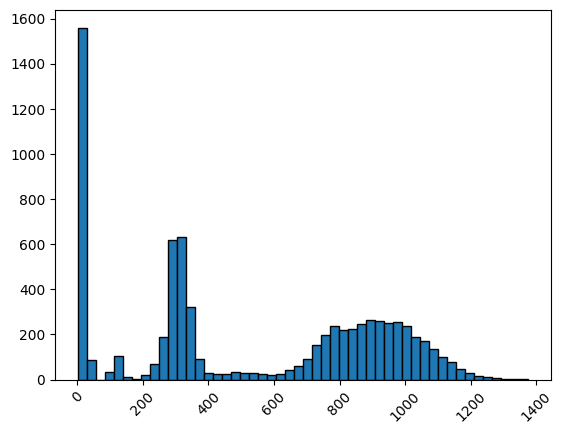

In [85]:
amount_fraud = df[df['is_fraud'] == 1]
plt.hist(amount_fraud["amt"], edgecolor="black", bins=50)
plt.xticks(rotation=45)
plt.show()

### ```Transaction Time Distribution```

**Transaction Time Distribution**

- The plot visualizes the distribution of transaction times (`'Hour'`).
- The x-axis represents the transaction times, and the y-axis represents the density of transactions at each time.
- The distribution illustrates how transactions are spread throughout the day.
- The pattern may reveal insights into peak transaction times or potential anomalies during specific hours.

These visualizations provide an initial understanding of the dataset's characteristics, aiding in further exploratory data analysis and feature engineering.

C:\Users\Dev\AppData\Local\Temp\ipykernel_20304\1765529785.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax, color='b')


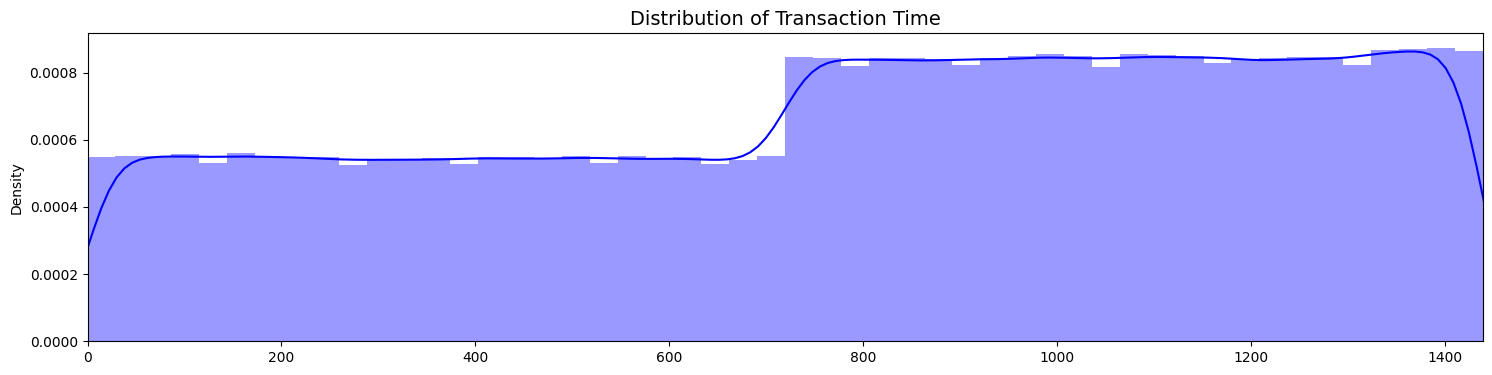

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(18,4))

time_val = df['Hour'].values

sns.distplot(time_val, ax=ax, color='b')
ax.set_title('Distribution of Transaction Time', fontsize=14)
ax.set_xlim([min(time_val), max(time_val)])

plt.show()

### ```Fraud Distribution by Category```

We are visualizing the distribution of frauds based on category.

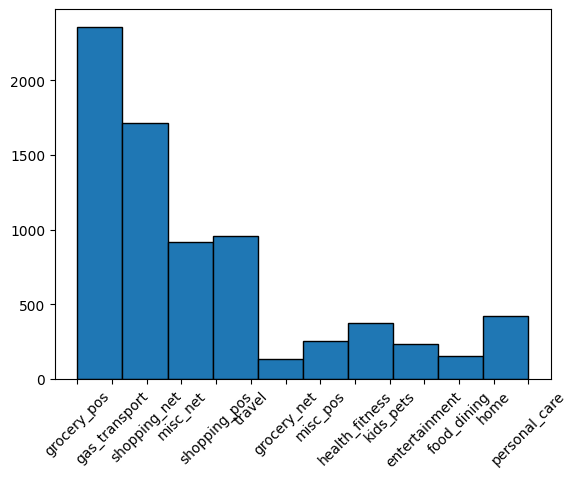

In [87]:
category_fraud = df[df['is_fraud'] == 1]
plt.hist(category_fraud["category"], edgecolor="black")
plt.xticks(rotation=45)
plt.show()

We are visualizing the distribution of frauds based on state.

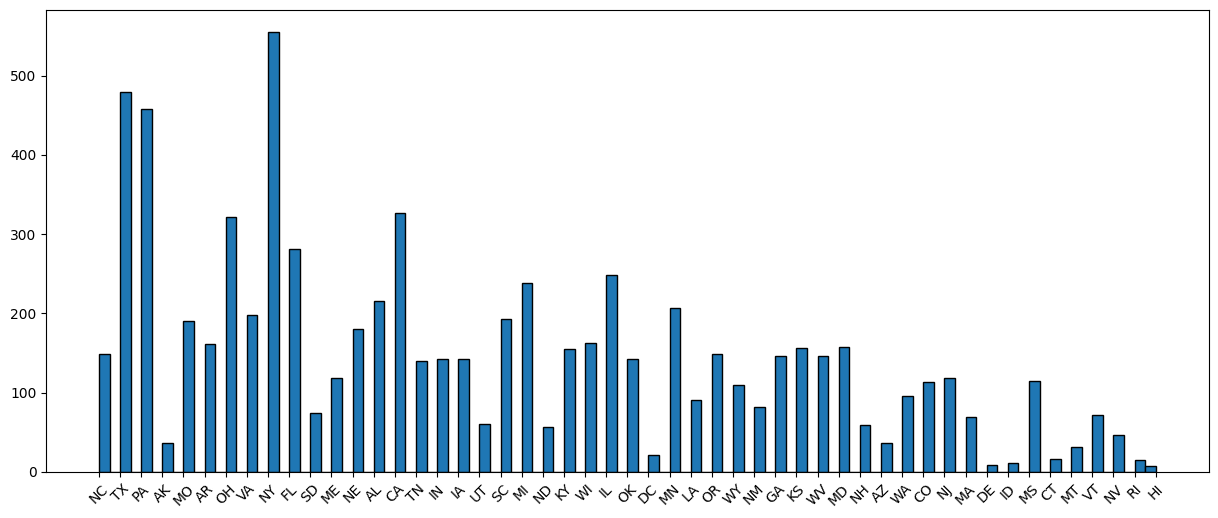

In [88]:
category_fraud = df[df['is_fraud'] == 1]
plt.figure(figsize=(15, 6))
plt.hist(category_fraud["state"], edgecolor="black", bins=100)
plt.xticks(rotation=45)
plt.show()

Below Visualization shows Merchant and General Locations on World Map

C:\Users\Dev\AppData\Local\Temp\ipykernel_20304\580423369.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


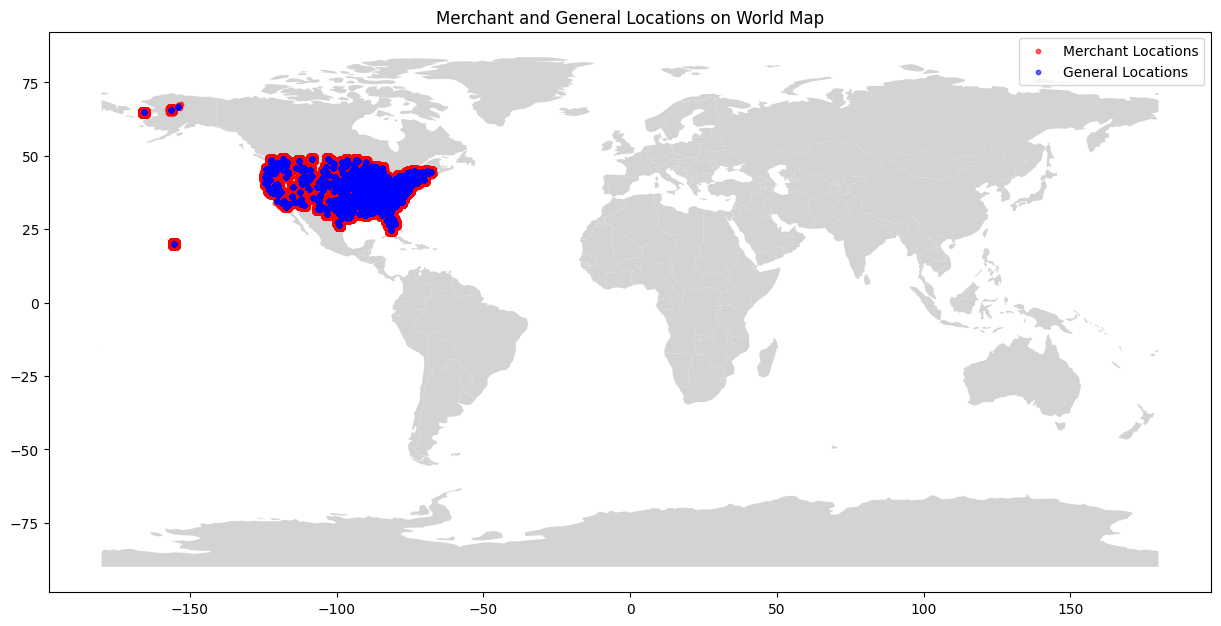

In [89]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 'merch_lat' and 'merch_long' are columns for merchant latitude and longitude
df['geometry_merch'] = gpd.points_from_xy(df['merch_long'], df['merch_lat'])
df['geometry_general'] = gpd.points_from_xy(df['long'], df['lat'])

gdf_merch = gpd.GeoDataFrame(df, geometry='geometry_merch')
gdf_general = gpd.GeoDataFrame(df, geometry='geometry_general')

# Plot the world map
world.plot(figsize=(15, 10), color='lightgrey')

# Plot the scatter points for merchant locations
gdf_merch.plot(ax=plt.gca(), marker='o', color='red', markersize=10, alpha=0.6, label='Merchant Locations')

# Plot the scatter points for general locations
gdf_general.plot(ax=plt.gca(), marker='o', color='blue', markersize=10, alpha=0.6, label='General Locations')

# Add title and legend, then show the plot
plt.title('Merchant and General Locations on World Map')
plt.legend()
plt.show()

### ```Correlation Matrix Analysis for 'is_fraud' Column```

The correlation matrix provides insights into the linear relationships between different variables, including their correlation with the target variable ('is_fraud'). Below are key observations

In [90]:
correlation_matrix = df.corr(numeric_only=True)

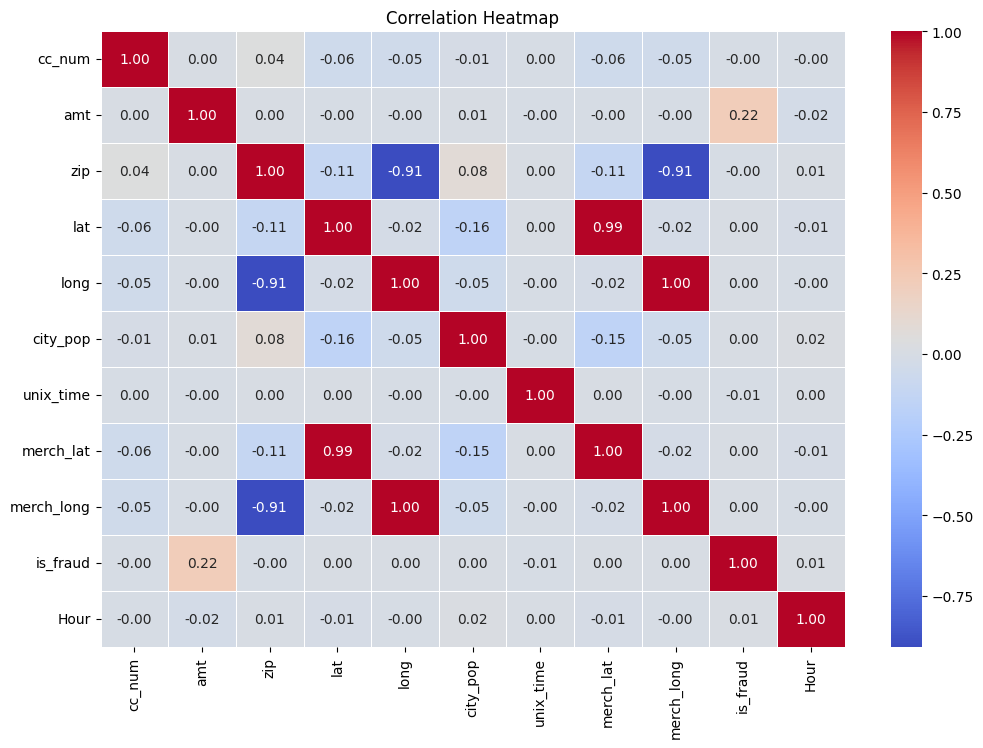

In [91]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()